In [1]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
from ibllib.atlas import AllenAtlas
from brainbox.core import TimeSeries
from brainbox.processing import bin_spikes
import neo.core
from quantities import s
import quantities
import numpy as np
import pandas as pd

In [2]:
pw = 'international'
one = ONE(base_url='https://openalyx.internationalbrainlab.org', password=pw, silent=True)
Atlas = AllenAtlas()
pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'

In [3]:
sl = SpikeSortingLoader(pid=pid, one=one, atlas=Atlas)
spikes, clusters, channels = sl.load_spike_sorting()
clusters = sl.merge_clusters(spikes, clusters, channels)
trials = one.load_object('SWC_043/2020-09-21/001', 'trials', collection='alf')

In [4]:
spikes

{'amps': array([1.12502950e-04, 1.69044700e-04, 7.31735374e-05, ...,
        6.32226820e-05, 8.56651966e-05, 1.58687280e-04]),
 'clusters': array([639, 518, 208, ...,  36, 258,  99], dtype=uint32),
 'depths': array([3540.57568359, 3132.62036133, 1634.10498047, ...,  293.59072876,
        2001.93505859,  865.07281494]),
 'times': array([5.48913109e-03, 8.12244216e-03, 1.18557439e-02, ...,
        4.29594537e+03, 4.29594561e+03, 4.29594777e+03])}

(<Figure size 1152x648 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'2020-09-21_1_SWC_043_probe00, da8dfec1-d265-44e8-84ce-6ae9c109b8bd \n17_575_242 spikes, 914 clusters'}>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='time (secs)', ylabel='depth (um)'>,
         <AxesSubplot:title={'center':'alf'}>]], dtype=object))

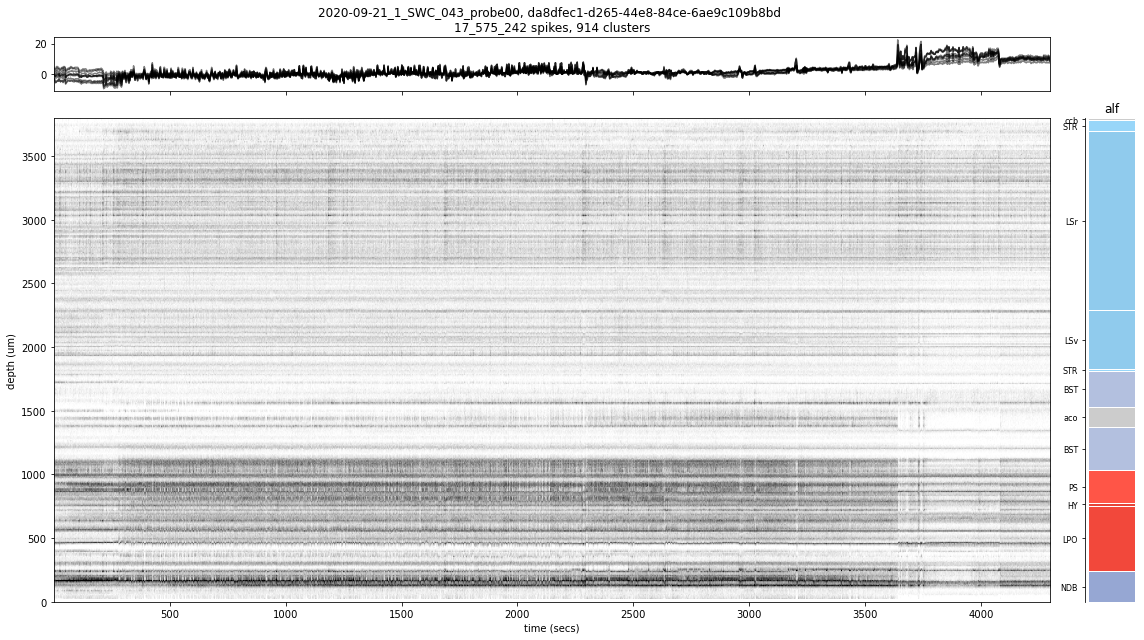

In [5]:
sl.raster(spikes, channels)

Find good clusters, all IBL designed metrics pass if the label is 1 --> stronger clusters

In [6]:
good_ids = clusters['cluster_id'][clusters['label'] == 1]

In [7]:
locations = [True if i in good_ids else False for i in spikes['clusters']]

In [8]:
good_spikes = {key:val[locations] for key, val in spikes.items()}
good_spikes

{'amps': array([1.12502950e-04, 1.69044700e-04, 7.31735374e-05, ...,
        2.02525975e-04, 1.10336245e-04, 1.58687280e-04]),
 'clusters': array([639, 518, 208, ...,  99, 114,  99], dtype=uint32),
 'depths': array([3540.57568359, 3132.62036133, 1634.10498047, ...,  894.89599609,
         918.56298828,  865.07281494]),
 'times': array([5.48913109e-03, 8.12244216e-03, 1.18557439e-02, ...,
        4.29593914e+03, 4.29593941e+03, 4.29594777e+03])}

(<Figure size 1152x648 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'2020-09-21_1_SWC_043_probe00, da8dfec1-d265-44e8-84ce-6ae9c109b8bd \n4_139_263 spikes, 165 clusters'}>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='time (secs)', ylabel='depth (um)'>,
         <AxesSubplot:title={'center':'alf'}>]], dtype=object))

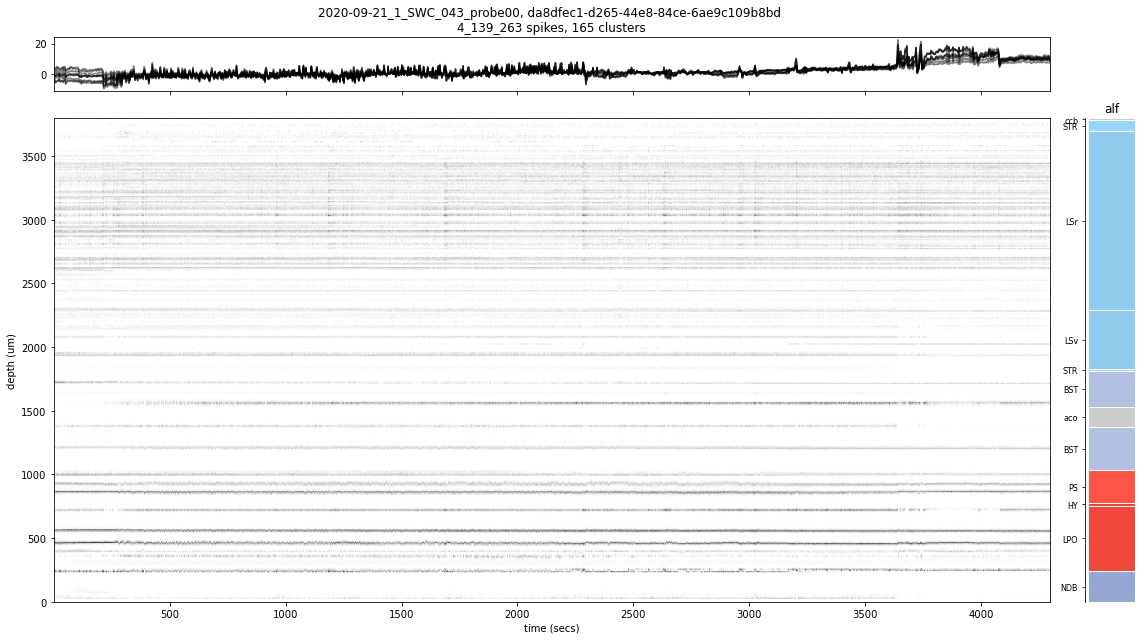

In [9]:
sl.raster(good_spikes, channels)

In [37]:
times_per_cluster = {}
for idx in range(len(good_spikes['clusters'])):
    if (good_spikes['times'][idx] > 270.2):
        if (good_spikes['clusters'][idx] not in times_per_cluster.keys()):
            times_per_cluster[good_spikes['clusters'][idx]] =[good_spikes['times'][idx]]
        else:
            times_per_cluster[good_spikes['clusters'][idx]] += [good_spikes['times'][idx]]
    else:
        continue

In [44]:
len(times_per_cluster.keys())

165

In [41]:
spiketrains = []

for i in range(len(trials['goCueTrigger_times'])): # trial #
    x = []
    for key,val in times_per_cluster.items():
        time_arr = []
        for time in val:
            if (time>=trials['goCueTrigger_times'][i]) and (time<=trials['firstMovement_times'][i]):
                time_arr += [time]
        print(len(time_arr))
        sp = neo.core.SpikeTrain(time_arr * s, trials['firstMovement_times'][i])
        x.append(sp)
    
    spiketrains.append(x)

5
10
0
8
2
14
6
2
0
3
2
2
2
3
2
4
0
0
3
2
4
2
3
1
6
1
3
4
4
4
5
6
1
3
1
6
4
2
5
3
5
1
5
1
2
1
2
2
1
5
2
1
3
3
5
5
3
4
3
3
3
2
2
1
3
1
5
1
2
2
1
1
3
1
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
4
0
4
2
1
0
0
0
0
1
0
0
2
1
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
30
65
8


KeyboardInterrupt: 

In [13]:
from elephant.gpfa import GPFA

# specify fitting parameters
bin_size = 13 * quantities.ms
latent_dimensionality = 2

gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality, em_max_iters=10)

In [19]:
spiketrains[0][0].spike_duration

In [29]:
gpfa_2dim.fit(spiketrains[0:5])

/home/jmakki/.local/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning: Binning discarded 10 last spike(s) of the input spiketrain
  warnings.warn("Binning discarded {} last spike(s) of the "
/home/jmakki/.local/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning: Binning discarded 5 last spike(s) of the input spiketrain
  warnings.warn("Binning discarded {} last spike(s) of the "
/home/jmakki/.local/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning: Binning discarded 15 last spike(s) of the input spiketrain
  warnings.warn("Binning discarded {} last spike(s) of the "


Initializing parameters using factor analysis...

Fitting GPFA model...


GPFA(bin_size=array(13.) * ms, em_max_iters=10, x_dim=2)

In [ ]:
len(spiketrains[4])

165

In [ ]:
trajectories = gpfa_2dim.transform(spiketrains[0:1])

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

linewidth_single_trial = 0.5
color_single_trial = 'C0'
alpha_single_trial = 0.5

linewidth_trial_average = 2
color_trial_average = 'C1'

ax1.set_title('Original latent dynamics')
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')
ax1.set_aspect(1)
ax1.plot(oscillator_trajectory_2dim[0], oscillator_trajectory_2dim[1])

ax2.set_title('Latent dynamics extracted by GPFA')
ax2.set_xlabel('Dim 1')
ax2.set_ylabel('Dim 2')
ax2.set_aspect(1)
# single trial trajectories
for single_trial_trajectory in trajectories:
    ax2.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-', lw=linewidth_single_trial, c=color_single_trial, alpha=alpha_single_trial)
# trial averaged trajectory
average_trajectory = np.mean(trajectories, axis=0)
ax2.plot(average_trajectory[0], average_trajectory[1], '-', lw=linewidth_trial_average, c=color_trial_average, label='Trial averaged trajectory')
ax2.legend()

plt.tight_layout()
plt.show()